In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score
from sklearn.utils import shuffle
import time

In [2]:
benign1=pd.read_csv("medbiot/bashlite_leg_fan.csv")
benign2=pd.read_csv("medbiot/bashlite_leg_light.csv")
benign3=pd.read_csv("medbiot/bashlite_leg_lock.csv")
benign4=pd.read_csv("medbiot/bashlite_leg_switch.csv")
benign5=pd.read_csv("medbiot/torii_leg_light.csv")
benign6=pd.read_csv("medbiot/torii_leg_fan.csv")
benign7=pd.read_csv("medbiot/torii_leg_lock.csv")
benign8=pd.read_csv("medbiot/torii_leg_raspberry1.csv")
benign9=pd.read_csv("medbiot/torii_leg_raspberry2.csv")
benign10=pd.read_csv("medbiot/torii_leg_switch.csv")
benign11=pd.read_csv("medbiot/mirai_leg_fan.csv")
benign12=pd.read_csv("medbiot/mirai_leg_light.csv")
benign13=pd.read_csv("medbiot/mirai_leg_lock.csv")
benign14=pd.read_csv("medbiot/mirai_leg_switch.csv")
mirai1=pd.read_csv("medbiot/mirai_mal_CC_fan.csv")
mirai2=pd.read_csv("medbiot/mirai_mal_CC_light.csv")
mirai3=pd.read_csv("medbiot/mirai_mal_CC_lock.csv")
mirai4=pd.read_csv("medbiot/mirai_mal_CC_switch.csv")
mirai5=pd.read_csv("medbiot/mirai_mal_spread_fan.csv")
mirai6=pd.read_csv("medbiot/mirai_mal_spread_light.csv")
mirai7=pd.read_csv("medbiot/mirai_mal_spread_lock.csv")
mirai8=pd.read_csv("medbiot/mirai_mal_spread_switch.csv")
bahslite1=pd.read_csv("medbiot/bashlite_mal_CC_fan.csv")
bahslite2=pd.read_csv("medbiot/bashlite_mal_CC_light.csv")
bahslite3=pd.read_csv("medbiot/bashlite_mal_CC_lock.csv")
bahslite4=pd.read_csv("medbiot/bashlite_mal_CC_switch.csv")
bahslite5=pd.read_csv("medbiot/bashlite_mal_spread_fan.csv")
bahslite6=pd.read_csv("medbiot/bashlite_mal_spread_light.csv")
bahslite7=pd.read_csv("medbiot/bashlite_mal_spread_lock.csv")
bahslite8=pd.read_csv("medbiot/bashlite_mal_spread_switch.csv")
tori1=pd.read_csv("medbiot/torii_mal_fan.csv")
tori2=pd.read_csv("medbiot/torii_mal_light.csv")
tori3=pd.read_csv("medbiot/torii_mal_lock.csv")
tori4=pd.read_csv("medbiot/torii_mal_raspberry1.csv")
tori5=pd.read_csv("medbiot/torii_mal_raspberry2.csv")
tori6=pd.read_csv("medbiot/torii_mal_switch.csv")

In [3]:
benign1['Out']='Benign'
benign2['Out']='Benign'
benign3['Out']='Benign'
benign4['Out']='Benign'
benign5['Out']='Benign'
benign6['Out']='Benign'
benign7['Out']='Benign'
benign8['Out']='Benign'
benign9['Out']='Benign'
benign10['Out']='Benign'
benign11['Out']='Benign'
benign12['Out']='Benign'
benign13['Out']='Benign'
benign14['Out']='Benign'
mirai1['Out']='Mirai'
mirai2['Out']='Mirai'
mirai3['Out']='Mirai'
mirai4['Out']='Mirai'
mirai5['Out']='Mirai'
mirai6['Out']='Mirai'
mirai7['Out']='Mirai'
mirai8['Out']='Mirai'
bahslite1['Out']='Bashlite'
bahslite2['Out']='Bashlite'
bahslite3['Out']='Bashlite'
bahslite4['Out']='Bashlite'
bahslite5['Out']='Bashlite'
bahslite6['Out']='Bashlite'
bahslite7['Out']='Bashlite'
bahslite8['Out']='Bashlite'
tori1['Out']='Torii'
tori2['Out']='Torii'
tori3['Out']='Torii'
tori4['Out']='Torii'
tori5['Out']='Torii'
tori6['Out']='Torii'

In [4]:
df=pd.concat([benign1,benign2,benign3,benign4,benign5,benign6,benign7,benign8,benign9,benign10,benign11,benign12,benign13,benign14,
              mirai1,mirai2,mirai3,mirai4,mirai5,mirai6,mirai7,mirai8,bahslite1,bahslite2,bahslite3,bahslite4,bahslite5,bahslite6,bahslite7,bahslite8,
             tori1,tori2,tori3,tori4,tori5,tori6],axis=0)
df=shuffle(df)
y=df['Out']
df=df.drop(['Out'],axis=1)
X=df.iloc[:,:115]
start = time.time()

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [6]:
# Applying T-SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3)
X = svd.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1494055, 3) (640310, 3) (1494055,) (640310,)


In [8]:
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.ensemble import AdaBoostClassifier

params = {'n_estimators':[700],'learning_rate':[0.1]}
grid = EvolutionaryAlgorithmSearchCV(AdaBoostClassifier(), params, verbose=1, cv=3)
print (grid.fit(x_train,y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Types [1, 2] and maxint [0, 0] detected
--- Evolve in 1 possible combinations ---
gen	nevals	avg     	min     	max     	std        
0  	50    	0.939431	0.939431	0.939431	1.11022e-16
1  	37    	0.939431	0.939431	0.939431	1.11022e-16
2  	29    	0.939431	0.939431	0.939431	1.11022e-16
3  	24    	0.939431	0.939431	0.939431	1.11022e-16
4  	28    	0.939431	0.939431	0.939431	1.11022e-16
5  	35    	0.939431	0.939431	0.939431	1.11022e-16
6  	31    	0.939431	0.939431	0.939431	1.11022e-16
7  	33    	0.939431	0.939431	0.939431	1.11022e-16
8  	29    	0.939431	0.939431	0.939431	1.11022e-16
9  	35    	0.939431	0.939431	0.939431	1.11022e-16
10 	22    	0.939431	0.939431	0.939431	1.11022e-16
Best individual is: {'n_estimators': 700, 'learning_rate': 0.1}
with fitness: 0.9394312793036401
None


In [9]:
yab= grid.predict(x_train)
end = time.time()
print(end - start, "seconds")
print('Accuracy Score:')
print(accuracy_score(y_train,yab))

5811.901839733124 seconds
Accuracy Score:
0.9396936525094458


In [10]:
clr= confusion_matrix(y_train,yab)
clr

array([[528251,   5578,  12500,    629],
       [  7567, 745666,   8396,    241],
       [ 27026,  18363,  94025,    494],
       [  1171,   5729,   2407,  36012]], dtype=int64)

Confusion matrix, without normalization
[[528251   5578  12500    629]
 [  7567 745666   8396    241]
 [ 27026  18363  94025    494]
 [  1171   5729   2407  36012]]
Normalized confusion matrix
[[9.65798105e-01 1.01982236e-02 2.28536743e-02 1.14999689e-03]
 [9.93214065e-03 9.78731280e-01 1.10202528e-02 3.16326932e-04]
 [1.93169797e-01 1.31250536e-01 6.72048775e-01 3.53089173e-03]
 [2.58390521e-02 1.26414969e-01 5.31123811e-02 7.94633597e-01]]


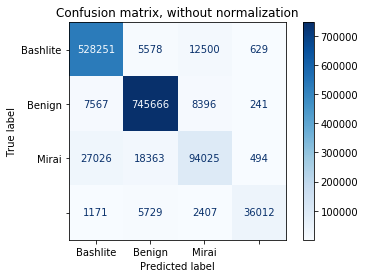

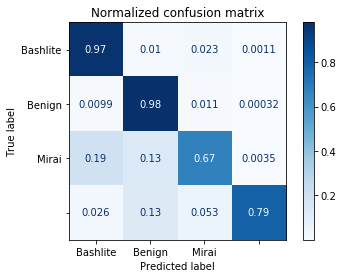

In [11]:
from sklearn.metrics import plot_confusion_matrix

classes=["Bashlite", "Benign", "Mirai"]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(grid, x_train, y_train,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [12]:
clrr = clr.astype('float') / clr.sum(axis=1)[:, np.newaxis]
clrr.diagonal()

array([0.96579811, 0.97873128, 0.67204877, 0.7946336 ])

In [13]:
acc_score= accuracy_score(y_train,yab)
acc_score

0.9396936525094458

In [14]:
Pr = precision_score(y_train, yab,  average="macro")
tpr = recall_score(y_train, yab,  average="macro")   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value

print("precision_score:", Pr)
print("recall:", tpr)

precision_score: 0.9158037275645279
recall: 0.8528029392668555


In [15]:
cm=confusion_matrix(y_train.ravel(), yab.ravel())
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]

rec = tp / (tp + fn)
spe = tn / (tn + fp)
fal = fp / (fp + tn)
mis = fn / (fn + tp)


print("Calculating recall (also called the true positive rate or the sensitivity) for each class: ",rec)
print("Calculating specificity (also called the true negative rate) for each class: ",spe)
print("Calculating fall out (also called the false positive rate) for each class: ",fal)
print("Calculating miss rate (also called the false negative rate) for each class: ",mis)

Calculating recall (also called the true positive rate or the sensitivity) for each class:  0.9899539717457945
Calculating specificity (also called the true negative rate) for each class:  0.9895509610755504
Calculating fall out (also called the false positive rate) for each class:  0.010449038924449589
Calculating miss rate (also called the false negative rate) for each class:  0.010046028254205539


In [16]:
print(classification_report(y_train, yab))

              precision    recall  f1-score   support

    Bashlite       0.94      0.97      0.95    546958
      Benign       0.96      0.98      0.97    761870
       Mirai       0.80      0.67      0.73    139908
       Torii       0.96      0.79      0.87     45319

    accuracy                           0.94   1494055
   macro avg       0.92      0.85      0.88   1494055
weighted avg       0.94      0.94      0.94   1494055

